In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import matplotlib

sys.path.append('../code/')
from interpolation import cfl_interpolation, cfl_interpolation5
from diusst_eulera import diusst_eulera
from diusst_eulerb import diusst_eulerb
from diusst_rk4a import diusst_rk4a
from diusst_rk4b import diusst_rk4b
from diusst_eulerc import diusst_eulerc

from diusst_funcs import make_mesh

## Settings

In [2]:
# Fit parameters
param_names = ['kappa', 'mu', 'attenu', 'k0', 'gamma']
parama = np.array([1e-4, 1e-4, 2.5])
paramb = np.array([3e-4, 1e-4, 2.5])
paramc = np.array([2e-4, 1e-4, 2.5, 0.95, 2])
param_max = np.array([10e-4, 1e-4, 2.5])

# DIUSST model
scheme = 'euler'
dz0 = 0.10
ngrid = 40
z_f = 10
diffu = 1
opac = 1
k_mol = 1e-7
maxwind = 10

# Dataset
data_path = '../data/bayesian_training/'
data_filename = 'training_minnett_ssterr03-10_humid10.csv'
data_interval = [1175,1585]

## Data

In [4]:
# Load dataset
data_orig = pd.read_csv(data_path+data_filename)[data_interval[0]:data_interval[1]]

# interpolate to meet CFL condition
data, dtlist, idxlist = cfl_interpolation(data_orig, dz0=dz0, ngrid=ngrid,
        a=0, b=1, k_eddy_max=param_max[0], maxwind=maxwind,)
        #save=output_path+timestamp+'_'+run_id)


# extract data
ftemp = np.mean(data['ftemp'].to_numpy(np.float64))
sst_data = data['sst'].to_numpy(np.float64) - data['ftemp'].to_numpy(np.float64)
sst_err = data['sst_err'].to_numpy(np.float64)
times = data['times'].to_numpy(np.float64)
wind = data['wind'].to_numpy(np.float64)
atemp = data['atemp'].to_numpy(np.float64)
atemp_rel = atemp - data['ftemp'].to_numpy(np.float64) + ftemp
swrad = data['swrad'].to_numpy(np.float64)
humid = data['humid'].to_numpy(np.float64)

+++ Variable time-step interpolation +++
Interpolated dataset has 86886 time steps with average length 6.314 s.
Constant dt interpolation would require dt = 1.074 s --> 336827 steps.
Computation time will be reduced by 74.205 %
++++++++++++++++++++++++++++++++++++++++


In [5]:
kappas = [5e-5,1e-4,2e-4,4e-4]

simkappas = []
for i in range(len(kappas)):
    
    simstart = time.time()

    simkappas.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=kappas[i], mu=0.01, attenu=2.5, k0=0.9, gamma=10,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

2.69388484954834
2.8681631088256836
2.8326990604400635
3.096595048904419


[Text(0.5, 1.0, 'SST-ftemp')]

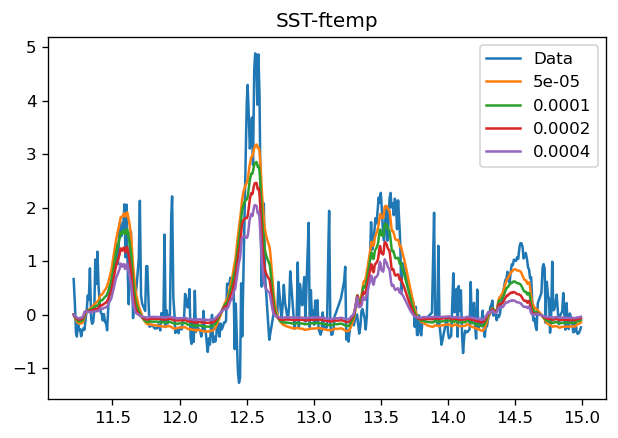

In [6]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(kappas)):
    ax.plot(times/86400,simkappas[i][0][:,0]-ftemp,label=kappas[i])

ax.legend()
ax.set(title='SST-ftemp')

In [7]:
mus = [0.001,0.005,0.01,0.02,0.05]

simmus = []
for i in range(len(mus)):
    
    simstart = time.time()

    simmus.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=1e-4, mu=mus[i], attenu=2.5, k0=0.9, gamma=10,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

2.5365161895751953
2.842611312866211
2.50002384185791
2.479740858078003
2.4952564239501953


[Text(0.5, 1.0, 'SST-ftemp')]

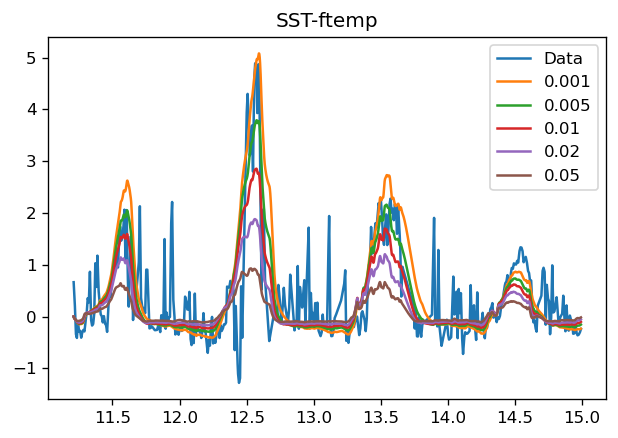

In [8]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(mus)):
    ax.plot(times/86400,simmus[i][0][:,0]-ftemp,label=mus[i])

ax.legend()
ax.set(title='SST-ftemp')

In [9]:
attenus = [1,2,3,4,6]

simattenus = []
for i in range(len(attenus)):
    
    simstart = time.time()

    simattenus.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=1e-4, mu=0.01, attenu=attenus[i], k0=0.9, gamma=10,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

2.8471012115478516
2.497718095779419
2.5677003860473633
2.517087459564209
2.5715489387512207


[Text(0.5, 1.0, 'SST-ftemp')]

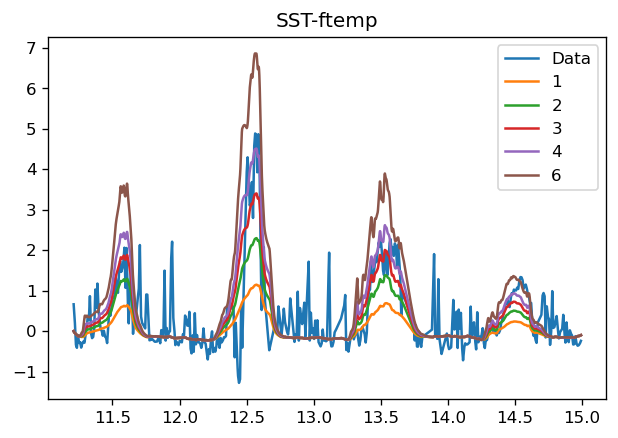

In [10]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(attenus)):
    ax.plot(times/86400,simattenus[i][0][:,0]-ftemp,label=attenus[i])

ax.legend()
ax.set(title='SST-ftemp')

In [47]:
k0s = [0,0.1,0.7,0.8,0.9,0.99]

In [10]:
simk0s = []
for i in range(len(k0s)):
    
    simstart = time.time()

    simk0s.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=1e-5, mu=0.01, attenu=3, k0=k0s[i], gamma=1,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

2.6279456615448
3.097921848297119
2.551978588104248
3.308155059814453
2.6495373249053955
2.501587152481079


[Text(0.5, 1.0, 'SST-ftemp')]

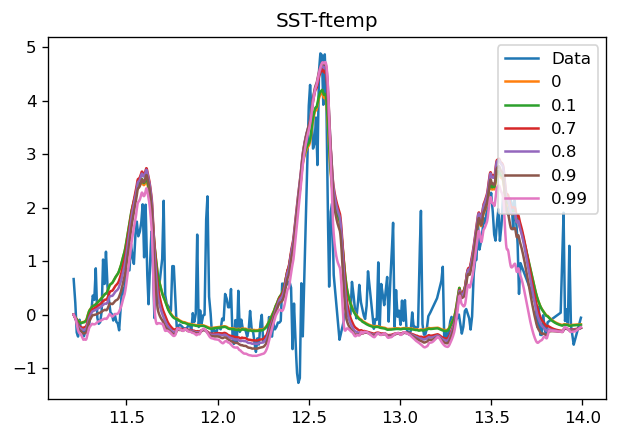

In [11]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(k0s)):
    ax.plot(times/86400,simk0s[i][0][:,0]-ftemp,label=k0s[i])

ax.legend()
ax.set(title='SST-ftemp')

In [27]:
x = make_mesh(0.1,50)[0]
def f(x,a,b):
    return ((1-a*np.exp(x/b))/(1-a*np.exp(-10/b)))

def g(x,a):
    return a*np.exp(x*np.log(a)/10)

No handles with labels found to put in legend.


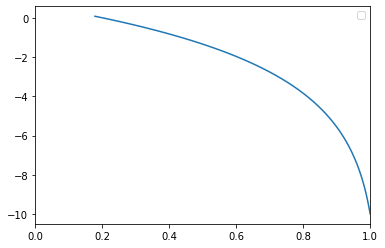

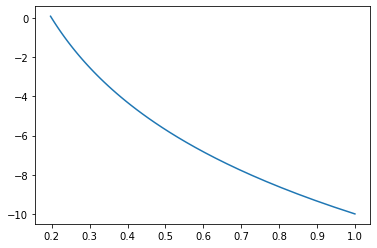

In [30]:
for i in range(1):
    plt.plot(f(x,0.8,3),x)
plt.legend()
plt.xlim(0,1)
plt.show()
plt.plot(g(x,0.2),x)

In [14]:
gammas = [1,2,5,10,100]

simgammas = []
for i in range(len(gammas)):
    
    simstart = time.time()

    simgammas.append(diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=5e-5, mu=0.01, attenu=3, k0=0.9, gamma=gammas[i],
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid))

    print(time.time()-simstart)

5.253685235977173
4.17743182182312
2.5151915550231934
2.4310150146484375
2.4193856716156006


[Text(0.5, 1.0, 'SST-ftemp')]

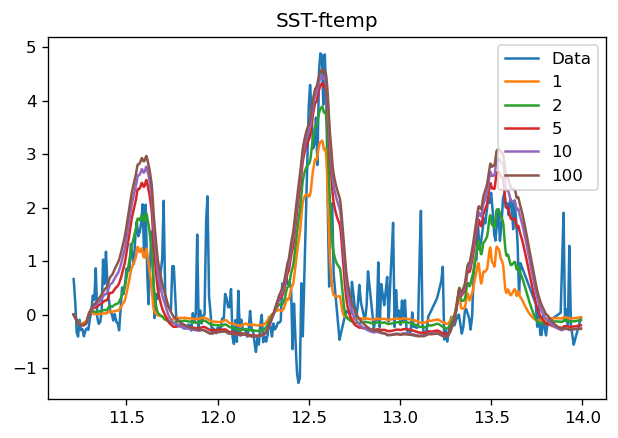

In [15]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data, label='Data')
for i in range(len(gammas)):
    ax.plot(times/86400,simgammas[i][0][:,0]-ftemp,label=gammas[i])

ax.legend()
ax.set(title='SST-ftemp')

In [22]:
sim1 = diusst_eulera(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=5e-5, mu=0.005, attenu=3.5,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid)

In [28]:
sim2 = diusst_eulerb(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=3e-4, mu=0.005, attenu=3.5,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid)

In [33]:
sim3 = diusst_eulerc(
                times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=5e-5, mu=0.005, attenu=3.5, k0=0, gamma=1,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid)

In [98]:
k_eddy=0.0002; mu=0.001; attenu=4; k0=.8; gamma=3

# Load dataset
data_orig = pd.read_csv(data_path+data_filename)[data_interval[0]:data_interval[1]]

# interpolate to meet CFL condition
data, dtlist, idx = cfl_interpolation5(data_orig, dz0=dz0, ngrid=ngrid,
        k_mol = k_mol,
        k_eddy_max=k_eddy, k_0_min=k0, lambd_min=gamma,
        maxwind=maxwind, z_f=z_f)


# extract data
ftemp = np.mean(data['ftemp'].to_numpy(np.float64))
sst_data = data['sst'].to_numpy(np.float64) - data['ftemp'].to_numpy(np.float64)
sst_err = data['sst_err'].to_numpy(np.float64)
times = data['times'].to_numpy(np.float64)
wind = data['wind'].to_numpy(np.float64)
atemp = data['atemp'].to_numpy(np.float64)
atemp_rel = atemp - data['ftemp'].to_numpy(np.float64) + ftemp
swrad = data['swrad'].to_numpy(np.float64)
humid = data['humid'].to_numpy(np.float64)


timer = time.time()
sim5 = diusst_eulerc(
                times, atemp_rel, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
                k_eddy=k_eddy, mu=mu, attenu=attenu, k0=k0, gamma=gamma,
                opac=opac, k_mol=k_mol,
                dz=dz0, ngrid=ngrid)
print(time.time()-timer)

+++ Variable time-step interpolation +++
Interpolated dataset has 69409 time steps with average length 6.97 s.
Constant dt interpolation would require dt = 1.406 s --> 257319 steps.
Computation time will be reduced by 73.026 %
++++++++++++++++++++++++++++++++++++++++
3.7036170959472656


-3.0452936687931453


[Text(0.5, 1.0, 'SST-ftemp')]

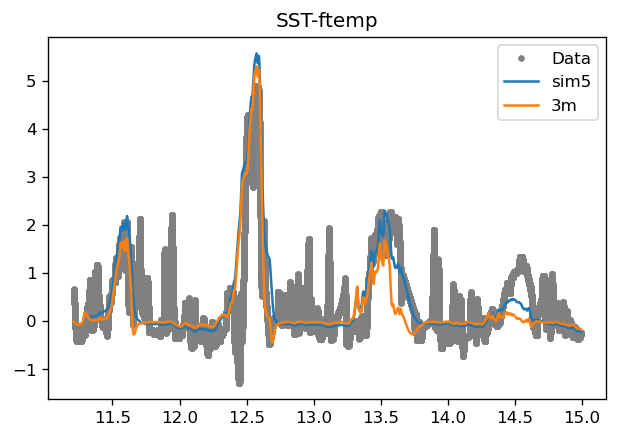

In [99]:
fig, ax = plt.subplots(dpi=120)
ax.plot(times/86400,sst_data,'.',c='gray', label='Data')
#ax.plot(times/86400,sim1[0][:,0]-ftemp,label='sim1')
#ax.plot(times/86400,sim2[0][:,0]-ftemp,'--',label='sim2')
#ax.plot(times/86400,sim3[0][:,0]-ftemp,'--',label='sim3')
#ax.plot(times/86400,sim4[0][:,0]-ftemp,label='sim4')
ax.plot(times/86400,sim5[0][:,0]-ftemp,label='sim5')
ax.plot(times/86400,sim5[0][:,0]-sim5[0][:,20],label='3m')
print(sim5[1][20])

ax.legend()
ax.set(title='SST-ftemp')

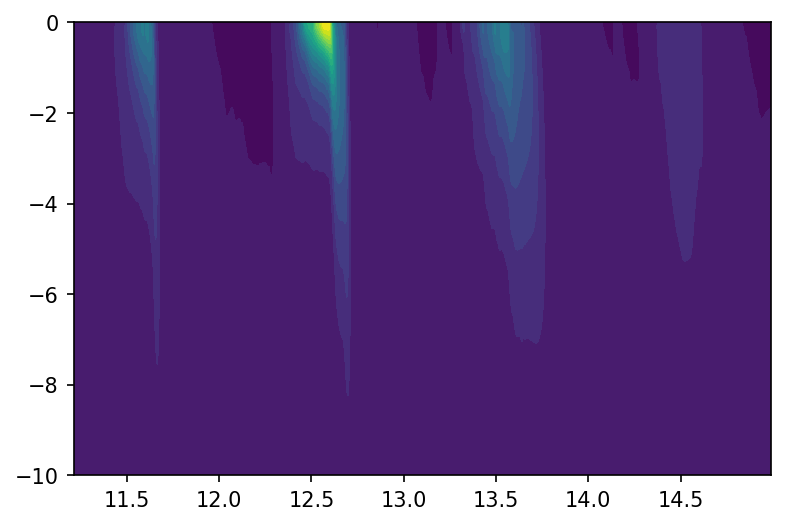

In [100]:
fig, ax = plt.subplots(dpi=150)
ax.contourf(sim5[2]/86400,sim5[1],sim5[0].transpose(),levels=20)

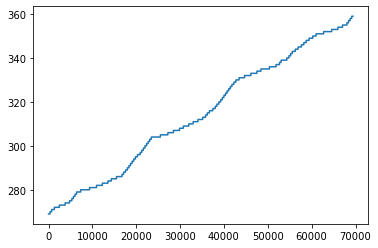

In [101]:
# hourly profile
t_hour = np.floor(sim5[2]/3600)
plt.plot(t_hour)

In [102]:
idx_fullhour = np.where(t_hour[1:]-t_hour[:-1]==1)[0]

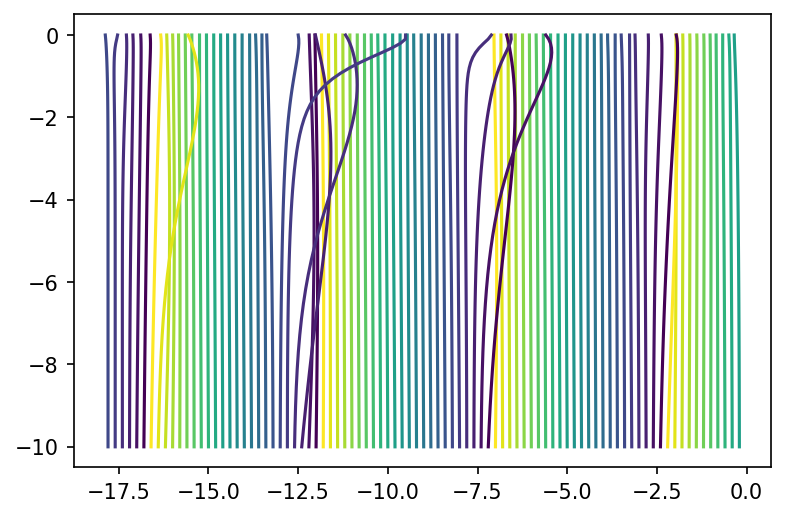

In [103]:
cols = matplotlib.cm.viridis(np.linspace(0,1,24))
fig, ax = plt.subplots(dpi=150)
for i in range(1,len(idx_fullhour)):
    ax.plot(sim5[0][-idx_fullhour[i],:]-0.2*i-ftemp,sim5[1],c=cols[(c[i]+6)%24])

In [104]:
(times[idx_fullhour[0]]/86400 % 1)*24

5.997733333325442

In [62]:
c = (np.arange(len(idx_fullhour))+6) % 24

In [63]:
c

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23])

In [105]:
data_orig

,times,sst,sst_err,ftemp,wind,atemp,swrad,humid
1175,968631.12,296.664,0.3,296.000,1.056,297.993,1.5,0.01
1176,969330.72,296.722,0.3,296.432,0.735,298.129,0.8,0.01
1177,970030.80,296.668,0.3,296.998,2.555,297.473,-0.2,0.01
1178,970722.24,296.755,0.3,297.167,1.762,298.168,2.8,0.01
1179,971421.84,296.939,0.3,297.037,0.912,298.381,3.2,0.01
...,...,...,...,...,...,...,...,...
1580,1292332.56,301.158,1.0,301.463,0.304,300.836,0.6,0.01
1581,1293038.88,301.041,1.0,301.403,0.722,300.874,0.6,0.01
1582,1293762.96,300.935,1.0,301.286,0.963,300.941,0.7,0.01
1583,1294478.64,301.095,1.0,301.406,0.636,301.117,0.9,0.01


In [15]:
zz= make_mesh(0.1,40,z_f=10)[0]
zz

array([  0.1       ,   0.        ,  -0.1       ,  -0.20421554,
        -0.31282433,  -0.42601156,  -0.54397024,  -0.66690152,
        -0.79501502,  -0.92852919,  -1.06767171,  -1.21267983,
        -1.36380083,  -1.52129239,  -1.68542307,  -1.85647274,
        -2.03473308,  -2.22050806,  -2.41411445,  -2.6158824 ,
        -2.82615595,  -3.04529367,  -3.27366922,  -3.51167204,
        -3.75970796,  -4.01819993,  -4.28758874,  -4.56833373,
        -4.86091364,  -5.16582737,  -5.48359486,  -5.81475796,
        -6.15988138,  -6.51955361,  -6.89438796,  -7.2850236 ,
        -7.69212665,  -8.11639128,  -8.55854095,  -9.01932962,
        -9.49954302, -10.        ])

In [21]:
z[np.where(z>-stratdepth)[0][-1]]

-0.9285291926742554

In [22]:
q = np.zeros(12)

In [24]:
timer = time.time()
1 + 2*(1-3*np.exp(q))
print(time.time()-timer)

0.0005083084106445312
